## Building ARIMAX model

In [8]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.arima_model as ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from pandas import tseries
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [9]:
# Import/clean dataframes

X_train = pd.read_csv('X_train.csv', index_col='time')
X_test = pd.read_csv('X_test.csv', index_col='time')
Y_train = pd.read_csv('Y_train.csv', index_col='time')
Y_test = pd.read_csv('Y_test.csv', index_col='time')
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

X_train.index = pd.to_datetime(X_train.index)
X_test.index = pd.to_datetime(X_test.index)
Y_train.index = pd.to_datetime(Y_train.index)
Y_test.index = pd.to_datetime(Y_test.index)

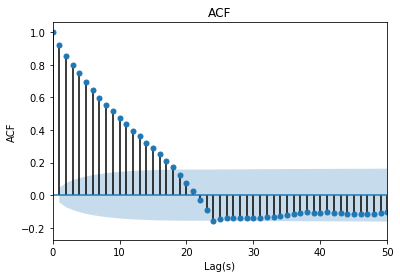

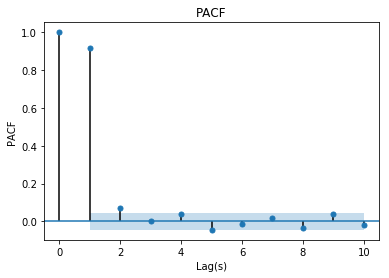

In [10]:
# Plotting ACF and PACF

# ACF
plot_acf(Y)
plt.title('ACF', loc='center')
plt.xlim((0, 50))
plt.ylabel('ACF')
plt.xlabel('Lag(s)')
plt.show()

# PACF
plot_pacf(Y, lags=10)
plt.title('PACF', loc='center')
plt.ylabel('PACF')
plt.xlabel('Lag(s)')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                    XEM   No. Observations:                 1310
Model:                     ARMA(1, 0)   Log Likelihood                4896.098
Method:                       css-mle   S.D. of innovations              0.006
Date:                Fri, 05 Jan 2018   AIC                          -9776.195
Time:                        02:14:06   BIC                          -9734.773
Sample:                    08-29-2017   HQIC                         -9760.660
                         - 10-23-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0006      0.002     -0.351      0.725      -0.004       0.003
IOT               0.0815      0.011      7.470      0.000       0.060       0.103
gg_crypto     -3.849e-05   5.49e-05     

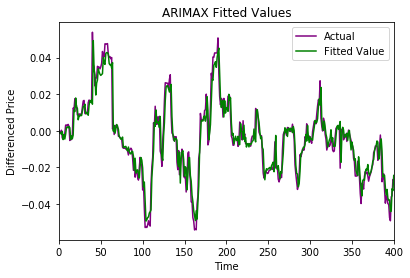

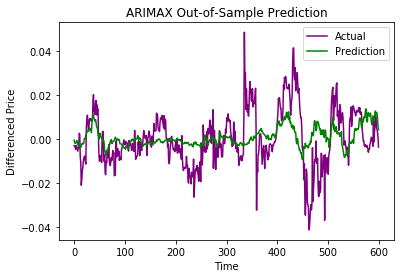

In [11]:
# ARIMAX

# Building AR 2 with exogeneous variables
arima_d = ARIMA.ARIMA(endog=Y_train['XEM'], exog=X_train, order=[1,0,0])
arima_results_d = arima_d.fit()
print(arima_results_d.summary())

# Plotting the fitted values
plt.plot(np.arange(len(Y_train)), Y_train, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_d.fittedvalues)), arima_results_d.fittedvalues, color='green', label='Fitted Value')
plt.xlim((0, 400))
plt.title('ARIMAX Fitted Values')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Out-of-sample prediction
exog_d = X_test
arima_results_ofs_d = arima_results_d.predict(exog=exog_d, start=exog_d.index[0], end=exog_d.index[-1])
plt.plot(np.arange(len(Y_test)), Y_test, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_ofs_d)), arima_results_ofs_d, color='green', label='Prediction')
#plt.xlim((0, 50))
plt.title('ARIMAX Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [12]:
# Metric

# Calculating mean squared error for steps 1-100
expected = Y_test[:99]
predictions = arima_results_ofs_d[:99]
mse = mean_squared_error(expected, predictions)
print('Mean Squared Error')
print('Steps 1-100: %f' % mse)

# Calculating mean squred error for steps 101-600
expected = Y_test[100:]
predictions = arima_results_ofs_d[100:]
mse = mean_squared_error(expected, predictions)
print('Steps 101-600: %f' % mse)


Mean Squared Error
Steps 1-100: 0.000053
Steps 101-600: 0.000160


### Conclusions: 
Using AR 1 model with 5 exogeneous variables, the out of sample prediction performed relatively well for steps < 100. Since the error keeps compounding, the model doesn't do so well beyond step 100. 